<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico I - Estadística </h1>
<h3> Análisis y Visualización de Datos - 2019 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10. Usaremos una [versión ya limpia del dataset](https://www.kaggle.com/gsutters/the-human-freedom-index/home) que pueden descargar desde Kaggle.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con dos estimadores principales: *hf_score* que hace referencia a Human Freedom, y *ef_score* que hace referencia a Economic Freedom. Estos dos estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

In [2]:
seaborn.__version__

'0.9.0'

In [3]:
dataset = pandas.read_csv('datasets/hfi_cc_2018.csv')
dataset.shape

(1458, 123)

In [4]:
dataset.columns  # Way too many columns!

Index(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap',
       ...
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile'],
      dtype='object', length=123)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [5]:
important_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols += [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

In [6]:
dataset[important_cols]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,7.57,29.0,7.241402,57.0
5,2016,AUS,Australia,Oceania,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.250000,7.98,10.0,8.582219,4.0
6,2016,AUT,Austria,Western Europe,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,7.58,27.0,8.413474,16.0
7,2016,AZE,Azerbaijan,Caucasus & Central Asia,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,6.49,106.0,6.083277,130.0
8,2016,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.000000,7.34,49.0,7.397269,50.0
9,2016,BHR,Bahrain,Middle East & North Africa,NaN,0.0,0.0,0.0,10.0,10.0,10.0,0.0,3.333333,7.56,30.0,6.848035,75.0


1. Para evaluar el significado del puntaje 4.5, obtenemos el rango y medidas de dispersion del campo 'ef_score'.

Exportamos las columnas importantes a una variable, para el mundo y filtrando por region

In [7]:
world_dataset = dataset[important_cols]
latam_dataset = world_dataset[world_dataset['region'] == 'Latin America & the Caribbean']

Obtenemos el rango de 'ef_score'

In [8]:
max_pf_identity = world_dataset['pf_identity'].max()
min_pf_identity = world_dataset['pf_identity'].min()
min_pf_identity, max_pf_identity

(0.0, 10.0)

y tomamos la media, mediana, moda y la desviacion estandard

In [9]:
mean_pf_identity = world_dataset['pf_identity'].mean()
median_pf_identity = world_dataset['pf_identity'].median()
mode_pf_identity = world_dataset['pf_identity'].mode()
std_pf_identity = world_dataset['pf_identity'].std()
mean_pf_identity, median_pf_identity, mode_pf_identity, std_pf_identity

(7.33417997096807, 9.166666667000001, 0    10.0
 dtype: float64, 3.159472661477449)

Graficamente:

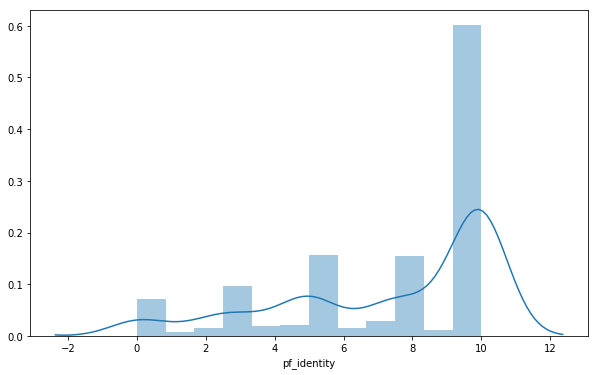

In [10]:
plt.figure(figsize=(10,6))
seaborn.distplot(dataset['pf_identity'].dropna())

Con los valores obtenidos, podemos concluir que el valor 4.5 es a nivel mundial, un puntaje que representa libertades limitadas con respecto a otros paises.

2. Considerando la evolucion de la libertad en Argentina

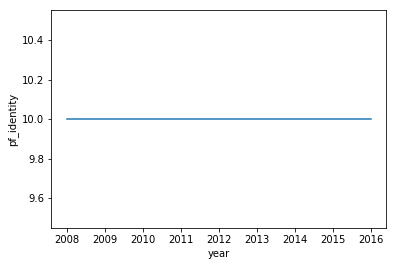

In [11]:
argentina_dataset = world_dataset[world_dataset['ISO_code'] == 'ARG']
seaborn.lineplot(data=argentina_dataset, x='year', y='pf_identity')

Podemos observar que el indice de libertad de indentidad se mantiene constante desde el año 2008 en el valor 10.

3. En cuanto a la relacion de la libertad de indetidad con la libertad humana y economica, podemos intuir que la libertad humana se encuentra mucho mas relacionada a la libertad de identidad que la economica. Esto puede comprobarse midiendo la correlacion de ambas variables contra *pf_identity*

In [12]:
world_dataset['hf_score'].corr(world_dataset['pf_identity']), world_dataset['ef_score'].corr(world_dataset['pf_identity'])

(0.6777541950437673, 0.3888772379714563)

Observamos una mayor correlacion entre *hf_score* y *pf_identity*, lo que nos permite suponer que la libertad humana tiene una relacion mas fuerte a la libertad de identidad que la economica.

## 1. Estadísticos descriptivos

  1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.
  2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda? 
  3. ¿Son todos los valores de *pf_identity*  y *hf_score* directamente comparables? ¿Qué otra variable podría influenciarlos?
  4. ¿Cómo pueden sanearse los valores faltantes?
  5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?
  
  

Obtenemos el mayor y menor valor para 'year'

In [13]:
max_year = latam_dataset['year'].max()
min_year = latam_dataset['year'].min()
min_year, max_year

(2008, 2016)

Obtenemos los diferentes valores de 'ISO_code', que es una variable categorica. Se corresponde uno a uno con 'countries'

In [14]:
latam_dataset['ISO_code'].unique(), latam_dataset['countries'].unique()

(array(['ARG', 'BHS', 'BRD', 'BLZ', 'BOL', 'BRA', 'CHL', 'COL', 'CRI',
        'DOM', 'ECU', 'SLV', 'GTM', 'GUY', 'HTI', 'HND', 'JAM', 'MEX',
        'NIC', 'PAN', 'PRY', 'PER', 'SUR', 'TTO', 'URY', 'VEN'],
       dtype=object),
 array(['Argentina', 'Bahamas', 'Barbados', 'Belize', 'Bolivia', 'Brazil',
        'Chile', 'Colombia', 'Costa Rica', 'Dominican Rep.', 'Ecuador',
        'El Salvador', 'Guatemala', 'Guyana', 'Haiti', 'Honduras',
        'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru',
        'Suriname', 'Trinidad and Tobago', 'Uruguay', 'Venezuela'],
       dtype=object))

Obtenemos el rango de las variables.

In [15]:
latam_dataset.describe().loc[['min','max']].transpose()

,min,max
year,2008.000000,2016.000000
pf_identity_legal,0.000000,10.000000
pf_identity_parental_marriage,0.000000,10.000000
pf_identity_parental_divorce,0.000000,10.000000
pf_identity_parental,0.000000,10.000000
pf_identity_sex_male,0.000000,10.000000
pf_identity_sex_female,0.000000,10.000000
pf_identity_sex,0.000000,10.000000
pf_identity_divorce,10.000000,10.000000
pf_identity,5.000000,10.000000


2. Obtenemos la media, mediana y desviacion estandard de 'pf_identity' en el mundo

In [16]:
world_dataset[['pf_identity', 'hf_score']].describe().loc[['mean','50%', 'std']].transpose()

,mean,50%,std
pf_identity,7.334180,9.166667,3.159473
hf_score,6.993444,6.923840,1.025811


Obtenemos la media, mediana y desviacion estandard de 'pf_identity' en Latinoamérica y el caribe

In [17]:
latam_dataset[['pf_identity', 'hf_score']].describe().loc[['mean','50%', 'std']].transpose()

,mean,50%,std
pf_identity,8.765086,10.000000,1.711732
hf_score,7.047982,7.028045,0.608904


Observamos que si bien el grado de libertad humana en America latina ligeramente es mas alto, al igual que la libertad de identidad, la dispersion es tambien notablemente menor en ambos casos.
Podemos obtener la moda de *pf_identity* para observar cual es el nivel de libertad en la mayor parte de los paises, pero no seria informacion relevante. Por otro lado, la moda no tiene sentido para *hf_score*, que al ser una variable continua, no nos permitira obtener un valor unico.

3. Si bien *hf_score* se encuentra influenciada por *pf_identity*, tambien son parte de la libertad humana muchas otras variables. Por ejemplo: las iniciadas con *pf_expression* o *pf_religion*

4. El saneado de los datos faltantes puede resolverse de diferentes maneras dependiendo del significado de la variable a estudiar y la cantidad de datos.
En el caso de tratarse de pocos datos ausentes en una muestra grande. Es posible ignorar la fila completa de datos.

5. Siendo *pf_identity* y *hf_score* dos variables limitadas entre 0 y 10, los valores extremos no pueden ser considerados outliers.

## 2. Agregación de datos

1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.
2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?
3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Hint: hay un gráfico de seaborn que hace todo por vos!

Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

1. Grafico de pf_identity a través de los años

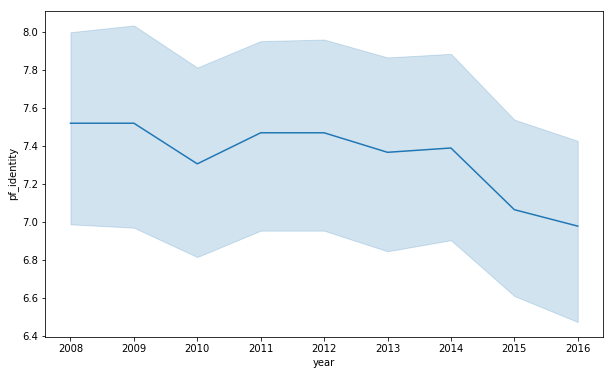

In [18]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=world_dataset, x='year', y='pf_identity')

Grafico de hf_score a través de los años

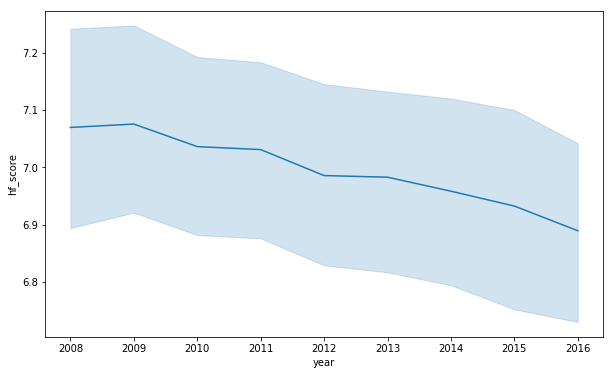

In [19]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=world_dataset, x='year', y='hf_score')

Separando por regiones
hf_score

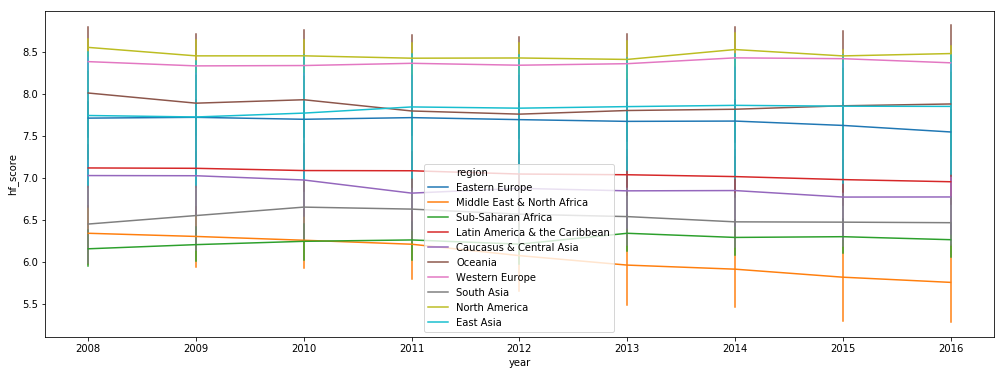

In [20]:
plt.figure(figsize=(17,6))
seaborn.lineplot(data=world_dataset, x='year', y='hf_score', hue='region', err_style="bars")

pf_identity

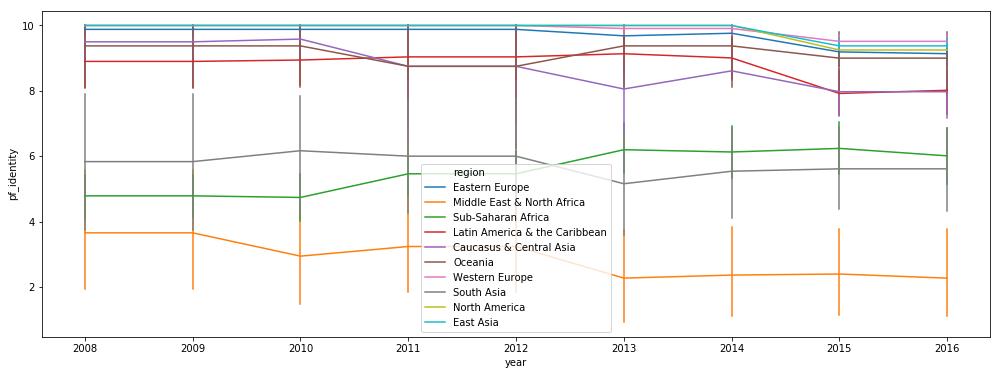

In [21]:
plt.figure(figsize=(17,6))
seaborn.lineplot(data=world_dataset, x='year', y='pf_identity', hue='region', err_style="bars")

Si bien la tendencia global pareciera indica que hay un decremento en las liertades de identidad, separando por regiones podemos ver que ese decremento pertenece principalmente a las eregiones de Medio Oriente y en los ultimos años de Latinoamerica y el caribe. Pero se notan mejoras en regiones como SUb-Sahara y Oceania.

3 Graficando los pasies de Latinoamerica

In [ ]:
Selecciono los paises con menores niveles en el ultimo año

In [27]:
last_year = latam_dataset[latam_dataset['year'] == 2016]
less_free = last_year[last_year['pf_identity'] <6]
less_free['ISO_code']

11    BRD
31    CHL
60    GUY
Name: ISO_code, dtype: object

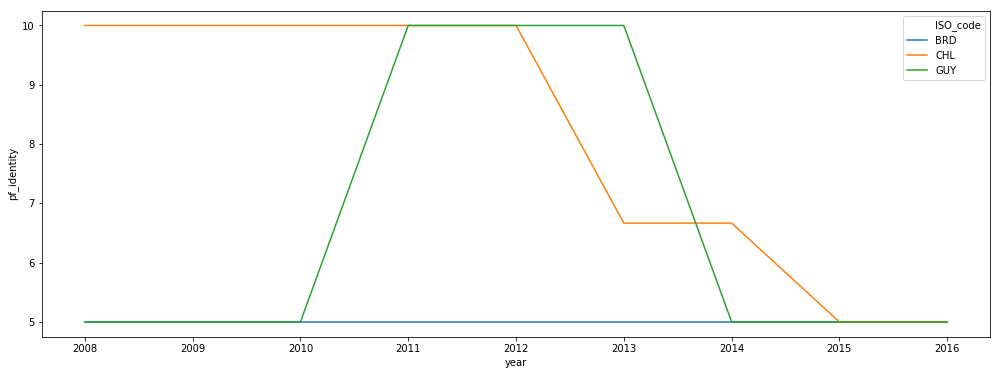

In [25]:
plt.figure(figsize=(17,6))
#selected_countries = latam_dataset
selected_countries = latam_dataset[latam_dataset['ISO_code'].isin(['BRD', 'CHL', 'GUY'])]
seaborn.lineplot(data=selected_countries, x='year', y='pf_identity', hue='ISO_code', err_style="bars")

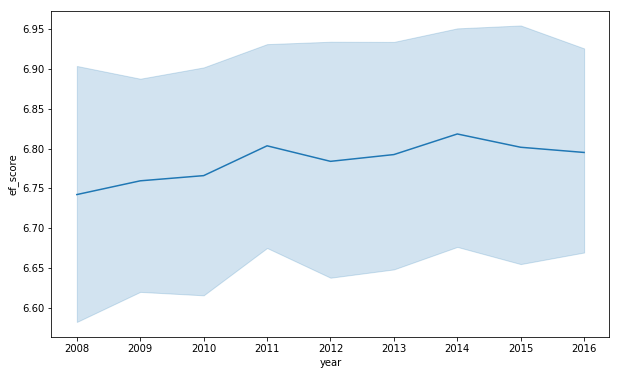

In [28]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=world_dataset, x='year', y='ef_score')

## 2. Distribuciones
  1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?
  2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.
  3. Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar a,bas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas.
  4. Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior. ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?

## 3. Correlaciones

En este ejercicio queremos responder a las preguntas

* Las libertades sociales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades individuales y respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, hf_score y ef_score. 

Como pf_indentity contribuye al cálculo de hf_score y ef_score, esperamos hallar algún grado de correlación. Sin embargo, queremos medir qué tanta correlación. 

1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
2. Graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en efecto, discreta.
3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 
4. [Opcional] Analizar la correlación entre la region y el hf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros)
